# Load Layer outputs

In [263]:
import pickle
with open('linear_NN_layer_outputs.dat','rb') as f:
    layer_outs,layer_outs_test= pickle.load(f)
f.close()

# Load recording and test data

In [264]:
import numpy as np
from keras.datasets import mnist
from scipy.misc import imresize

(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

(ntrain, xdim, ydim) = Xtrain.shape
ntest = Xtest.shape[0]

# Recording data
X_pr = Xtrain[30000:60000, :, :]
Y_pr = Ytrain[30000:60000]

# downsample
factor = 0.25

Xtest_down = np.ones((Xtest.shape[0], int(xdim*factor), int(ydim*factor)))
for i in range(Xtest.shape[0]):
    Xtest_down[i,:,:] = imresize(Xtest[i,:,:], factor)

X_pr_down = np.ones((X_pr.shape[0], int(xdim*factor), int(ydim*factor)))
for i in range(X_pr.shape[0]):
    X_pr_down[i,:,:] = imresize(X_pr[i,:,:], factor)
    
# VECTORIZE IMAGES
Xtest_down = Xtest_down.reshape(ntest, int(xdim*factor)**2).astype('float32') / 255
X_pr_down = X_pr_down.reshape(X_pr_down.shape[0], int(xdim*factor)**2).astype('float32') / 255

# Run Multiple Regressions

In [270]:
from copy import copy, deepcopy
from RE_PartialRecData2 import RE_PartialRecData2
from sklearn import preprocessing, linear_model
import pickle


# how many recordings?
nRecordings = 10
# how many neurons from the firs hidden layer?
#subnetSize = [2**x for x in range(8)]
subnetSize =[128]
nSubnetSize = len(subnetSize)
# which layers?
iLayer=3
# how many samples per recording?
nSamples = np.divide(int(X_pr_down.shape[0]/nRecordings),subnetSize)*100
#nSamples=[100 for i in range(nSubnetSize)]
# how many iterations
nIterations = 5

# baseline prediction error
#bl = np.std(layer_outs_test[oLayer]-np.mean(layer_outs_test[oLayer]));

oLayer = len(layer_outs)-1  # index of output layer
nOutNeurons = layer_outs[oLayer].shape[1]
rmses = np.zeros([nIterations, nOutNeurons, nSubnetSize])
for ss in range(nSubnetSize):
    r_coefs =np.zeros((nIterations, 10, 128))
    #nLayerNeurons = [subnetSize[ss], 0, 0, 0, 10]
    nLayerNeurons = subnetSize[ss]
    print(subnetSize[ss])
    for it in range(nIterations):
        # copy data - is this necessary?
        layer_outputs = deepcopy(layer_outs)
        # subsample
        X_subsample, Y_subsample = RE_PartialRecData2(layer_outputs[iLayer], layer_outputs[oLayer], \
                                                      nLayerNeurons, nRecordings, nSamples[ss])
        # impute X_subsample with mean value, apply imputation to test set
        imp =preprocessing.Imputer(missing_values='NaN', strategy='mean')
        impf =imp.fit(X_subsample)
        X_new = impf.transform(X_subsample)
        X_test_new= impf.transform(layer_outs_test[iLayer])
        # fit regression model
        #regr = linear_model.Lasso(0.01)
        regr =linear_model.LinearRegression()
        regr.fit(X_new, Y_subsample)
        r_coefs[it,:, ]=regr.coef_
        # calculate rmse
        rmses[it,:,ss] = np.sqrt(np.mean((regr.predict(X_test_new) - layer_outs_test[oLayer])**2, axis=0))
 
        print ('predicting, mean RMSEs=%f' %np.mean(rmses[it, :, ss]))
#         if np.mean(rmses[it, :, ss])>1:
#             breakflag=True
#             break
#     if breakflag:
#         break

            
# # save the rmse's
# with open('RMSE_Layer1_NLNN.dat','wb') as f:
#     pickle.dump(rmses, f)
# f.close()


128
predicting, mean RMSEs=0.000000
predicting, mean RMSEs=0.000000
predicting, mean RMSEs=0.000000
predicting, mean RMSEs=0.000000
predicting, mean RMSEs=0.000000


In [271]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
nn = load_model('linear_nn.h5')

In [272]:
a =nn.layers[0].get_weights()
a[0].shape# b = nn.layers[4].get_weights()
print(np.sum(a[0][:,0]*Xtest_down[0, :])+a[1][0])
print(layer_outs_test[0][0, 0])



0.0153292
0.0153292


In [273]:
a =nn.layers[3].get_weights()
a[0].shape# b = nn.layers[4].get_weights()
print(np.sum(a[0][:,0]*layer_outs_test[2][0, :])+a[1][0])
print(layer_outs_test[3][0, 0])


0.286002
0.286003


In [275]:
a =nn.layers[1].get_weights()
a[0].shape# b = nn.layers[4].get_weights()
print(np.sum(a[0][:,0]*layer_outs_test[0][0, :])+a[1][0])
print(layer_outs_test[1][0, 0])

-0.00322389
-0.0032239


In [277]:
a =nn.layers[4].get_weights()
a[0].shape# b = nn.layers[4].get_weights()
print(np.sum(a[0][:,0]*layer_outs_test[3][0, :])+a[1][0])
print(layer_outs_test[4][0, 0])

-1.4627
-1.4627


In [278]:
for i in range(nIterations):
    c =np.corrcoef(r_coefs[i, 1, :], a[0][:, 1])
    print(c[0,1])


0.969955986369
0.970517073147
0.968932918435
0.961755356099
0.967999772868


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  1000.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -

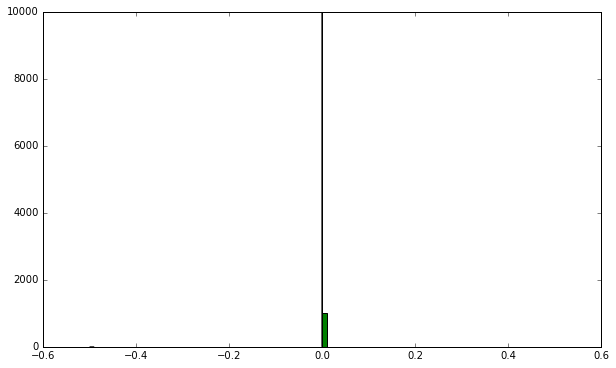

In [115]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

fig=pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

pl.hist(X_test_new[:, 11], 100)
pl.hist(X_new[:, 11], 100)

In [64]:
nRecordings=10
hLayerOuts =layer_outs[iLayer]
nSamples = 20
nLayerNeurons =64
oLayerOuts = layer_outs[oLayer]
import numpy as np
# returns a data set where, nLayerNeurons are recorded from a hidden layer, for each of nRecordings.
# Each partial recording has nSamples.
layerArray = np.zeros((nRecordings, nLayerNeurons), dtype=int)
for iRec in range(nRecordings):
    layerArray[iRec, :]= np.sort(np.random.choice(range(hLayerOuts.shape[1]), size=nLayerNeurons, replace=False))      

#print(layerArray)
X = np.nan*np.zeros((nRecordings*nSamples, hLayerOuts.shape[1]))
Y = np.nan*np.zeros((nRecordings*nSamples, oLayerOuts.shape[1]))

# get the data
sample_ind=0
for iRec in range(nRecordings):
    rec_inds = np.random.choice(range(hLayerOuts.shape[0]), size=nSamples, replace=True)
    #print(rec_inds)
    cols = layerArray[iRec, :]
    cols = cols[:, None]
    inds = np.array(range(sample_ind,((iRec+1)*nSamples)), dtype=int)
    X[inds, cols] = hLayerOuts[rec_inds, cols]
    Y[inds, :] = oLayerOuts[rec_inds, :]
    sample_ind = sample_ind + nSamples

In [70]:
print(oLayerOuts[rec_inds, :])
print(Y[inds, :])

[[  1.85872451e-09   7.69069970e-07   1.02532972e-07   2.26339489e-06
    4.99717726e-06   2.63526290e-09   7.92602356e-15   8.07757140e-04
    9.92751666e-07   9.99183118e-01]
 [  1.12052190e-08   9.21405868e-11   3.21917189e-13   6.32738393e-12
    2.99384837e-08   1.78120949e-10   1.33580783e-22   8.99196148e-01
    4.44876025e-10   1.00803912e-01]
 [  3.82415441e-18   3.98676724e-14   1.53948832e-07   9.99999881e-01
    8.23255078e-17   9.32785049e-09   6.76083625e-25   3.53728106e-16
    2.15845050e-10   9.12062925e-11]
 [  1.70427283e-11   1.67193741e-11   1.53190498e-11   3.27679163e-06
    1.58354636e-16   4.76516569e-12   2.94215730e-16   1.88558752e-11
    9.99996305e-01   4.63654857e-07]
 [  1.27942126e-20   3.68153251e-12   4.48373469e-14   1.30678149e-10
    9.75062824e-16   8.71371253e-15   9.60693259e-31   1.00000000e+00
    2.32977221e-10   2.28983534e-11]
 [  2.07677570e-10   9.44446209e-14   1.37762859e-12   4.99024650e-14
    3.19535154e-08   3.06370988e-12   1.00000